In [1]:
%matplotlib inline

Why we need deep learning frameworks?
================
-  Easily build big computational graphs
-  Easily compute gradients in computational graphs
-  Run it all efficiently on GPU

What is Pytorch?
================
PyTorch is a Python library built on top of torch’s THNN computational backend.
-  Easy to implement, code, and debug
-  Efficient tensor operations on CPU/GPU (both LA and DL operations)
-  More flexible due to its dynamic computational graph.
-  High execution efficiency, since it developed from C.

Three Levels of Abstraction in PyTorch
================
-  **Tensor**: Like array in Numpy, but runs on GPU
-  **Variable**: Node in a computational graph; stores data and gradient
-  **Module**: A neural network layer; may store state or learnable weights  

Tensor
==========================================
-  A 1d tensor is a vector (e.g. a sound sample),
-  A 2d tensor is a matrix (e.g. a grayscale image),
-  A 3d tensor is a vector of identically sized matrix (e.g. a multi-channel
image),
-  A 4d tensor is a matrix of identically sized matrix (e.g. a sequence of
multi-channel images),
-  etc.

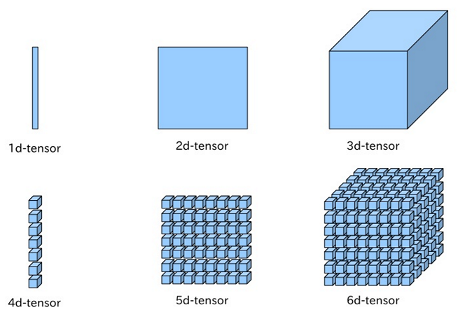

<div class="alert alert-info"><h4>Note</h4><p> Tensors are used to encode the signal to process, but also the internal states and parameters of the neural networks. </p></div>

In [69]:
from __future__ import print_function
import torch

Construct a 5x3 matrix, uninitialized:



In [70]:
x = torch.empty(5, 3)
print(x)

tensor([[ 0.0000e+00,  0.0000e+00, -2.8665e+00],
        [ 4.5807e-41, -1.3961e+07,  4.5807e-41],
        [ 1.5302e-38,  0.0000e+00,  1.5301e-38],
        [ 0.0000e+00, -1.5205e+07,  4.5807e-41],
        [-1.4822e+07,  4.5807e-41,  8.4581e+10]])


Construct a randomly initialized matrix:



In [71]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6561, 0.0203, 0.5896],
        [0.5290, 0.1491, 0.3326],
        [0.9770, 0.5373, 0.6851],
        [0.9550, 0.9032, 0.6589],
        [0.8195, 0.6179, 0.7311]])


Construct a matrix filled zeros and of dtype long:



In [20]:
x = torch.zeros(5, 3, dtype=torch.float32)
print(x)
x = torch.ones(5, 3, dtype=torch.float32)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


Construct a tensor directly from data:



In [30]:
x = torch.tensor([5, 3])
print(x)
print(x.type())

tensor([5, 3])
torch.LongTensor


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [49]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.2911, -1.4938,  0.3432],
        [-1.0177,  0.0784, -1.0027],
        [ 0.2092, -0.9908,  1.8341],
        [-0.2845,  1.5063,  1.1503],
        [ 0.1626,  0.2752,  0.7411]])


Get its size:



In [50]:
print(x.size())

torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p><b>torch.Size</b> is in fact a tuple, so it supports all tuple operations.</p></div>

Operations
----------------
There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1



In [51]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.6209, -1.3582,  0.7254],
        [-0.1615,  0.1959, -0.7253],
        [ 0.6351, -0.4278,  2.6813],
        [ 0.6923,  1.5162,  1.2014],
        [ 0.4014,  0.3851,  1.0856]])


Addition: syntax 2



In [52]:
print(torch.add(x, y))

tensor([[ 0.6209, -1.3582,  0.7254],
        [-0.1615,  0.1959, -0.7253],
        [ 0.6351, -0.4278,  2.6813],
        [ 0.6923,  1.5162,  1.2014],
        [ 0.4014,  0.3851,  1.0856]])


Addition: providing an output tensor as argument



In [53]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.6209, -1.3582,  0.7254],
        [-0.1615,  0.1959, -0.7253],
        [ 0.6351, -0.4278,  2.6813],
        [ 0.6923,  1.5162,  1.2014],
        [ 0.4014,  0.3851,  1.0856]])


Addition: in-place



In [54]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 0.6209, -1.3582,  0.7254],
        [-0.1615,  0.1959, -0.7253],
        [ 0.6351, -0.4278,  2.6813],
        [ 0.6923,  1.5162,  1.2014],
        [ 0.4014,  0.3851,  1.0856]])


<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an <b>_</b>.
    For example: <b>x.copy_(y)</b>, <b>x.t_()</b>, will change x.</p></div>

You can use standard NumPy-like indexing with all bells and whistles!



In [58]:
print(x[:, 1])

tensor([-1.4938,  0.0784, -0.9908,  1.5063,  0.2752])


**Resizing**: If you want to resize/reshape tensor, you can use ``torch.view``:



In [59]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [60]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.2701])
-1.2700836658477783


**Broadcasting** automagically expands dimensions of size 1 by replicating
coefficients, when it is necessary to perform operations.

In [76]:
a = torch.Tensor([5, -5, 5, -5, 5])
b = torch.Tensor([[1], [2], [3], [4]])
c = a + b
print(a)
print(b)
print(c)

tensor([ 5., -5.,  5., -5.,  5.])
tensor([[1.],
        [2.],
        [3.],
        [4.]])
tensor([[ 6., -4.,  6., -4.,  6.],
        [ 7., -3.,  7., -3.,  7.],
        [ 8., -2.,  8., -2.,  8.],
        [ 9., -1.,  9., -1.,  9.]])


In [78]:
x = torch.Tensor([1, 2, 3, 4, 5])
y = torch.Tensor(3, 5).fill_(2.0)
z = x + y
print(z)

tensor([[3., 4., 5., 6., 7.],
        [3., 4., 5., 6., 7.],
        [3., 4., 5., 6., 7.]])


In [84]:
a = torch.Tensor(3, 1, 5).fill_(1.0)
b = torch.Tensor(1, 3, 5).fill_(2.0)
c = a * b + a
print(c)

tensor([[[3., 3., 3., 3., 3.],
         [3., 3., 3., 3., 3.],
         [3., 3., 3., 3., 3.]],

        [[3., 3., 3., 3., 3.],
         [3., 3., 3., 3., 3.],
         [3., 3., 3., 3., 3.]],

        [[3., 3., 3., 3., 3.],
         [3., 3., 3., 3., 3.],
         [3., 3., 3., 3., 3.]]])


NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

**Converting a Torch Tensor to a NumPy Array**


In [62]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [63]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


See how the numpy array changed in value.



In [64]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Converting NumPy Array to Torch Tensor
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
See how changing the np array changed the Torch Tensor automatically



In [65]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.



In [66]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

Read later
---------
  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  [here](<https://pytorch.org/docs/stable/torch.html>)
  
**Creation**
-  torch.Tensor()
-  torch.Tensor(size)
-  torch.Tensor(sequence)
-  torch.eye(n)
-  torch.from numpy(ndarray)

**Indexing, Slicing, Joining, Mutating**
-  torch.Tensor.view(*args)
-  torch.Tensor.expand(*sizes)
-  torch.cat(inputs, dimension=0)
-  torch.chunk(tensor, chunks, dim=0)[source]
-  torch.index select(input, dim, index, out=None)
-  torch.t(input, out=None)
-  torch.transpose(input, dim0, dim1, out=None)

**Filling**
-  Tensor.fill (value)
-  torch.bernoulli(input, out=None)
-  torch.normal()

**Pointwise math**
-  torch.abs(input, out=None)
-  torch.add()
-  torch.cos(input, out=None)
-  torch.sigmoid(input, out=None)
-  (+ many operators)

**Math reduction**
-  torch.dist(input, other, p=2, out=None)
-  torch.mean()
-  torch.norm()
-  torch.std()
-  torch.sum()

**BLAS and LAPACK Operations**
-  torch.eig(a, eigenvectors=False, out=None)
-  torch.gels(B, A, out=None)
-  torch.inverse(input, out=None)
-  torch.mm(mat1, mat2, out=None)
-  torch.mv(mat, vec, out=None)